In [1]:
import urllib.request
import json
import dml
import prov.model
import datetime
import uuid
import statistics
import pandas as pd
from bson.code import Code


'''Retrieve some datasets'''

startTime = datetime.datetime.now()

# Set up the database connection.
client = dml.pymongo.MongoClient()
repo = client.repo
repo.authenticate('anuragp1_jl101995', 'anuragp1_jl101995')

# When Trial is True, perform function on random sample of size SIZE)
SIZE = 100

def get_collection(coll_name):
    # Collection for station sample
    sample_coll_name = coll_name.split(
        'repo.anuragp1_jl101995.')[1] + '_sample'
    repo.dropPermanent(sample_coll_name)
    repo.createPermanent(sample_coll_name)


    return eval(coll_name)



def scaleCiti(OldValue):
    OldMax = 400
    OldMin = 0
    NewMax = 2000
    NewMin = 0
    OldRange = (OldMax - OldMin)  
    NewRange = (NewMax - NewMin)  
    NewValue = (((OldValue - OldMin) * NewRange) / OldRange) + NewMin
    return NewValue

print('Loading data from Mongo')

# "Count" : 60, "Start_Station" : "1 Ave & E 15 St", "Date" : "01/01/2014"
citibike_data = repo.anuragp1_jl101995.citibike_startstation_byday.find()

# "ENTRIES" : 2, "DATE" : 20150423, "STATION" : "ZEREGA AVE"
turnstile_data = repo.anuragp1_jl101995.turnstile_total_byday.find()

data = []
citibike_entries, turnstile_entries = [], []

for entry in citibike_data:
    if int(entry['Date']) <= 20150531 and int(entry['Date']) >= 20141228:
        stationCode = entry['Start_Station'].replace(' ', '').replace('&', '').replace('-', '') # join and remove weird characters
        data.append((str(entry['Date']), entry['Start_Station'], stationCode, int(scaleCiti(entry['Count'])), 'C'))
        citibike_entries.append(int(entry['Count']))
        
for entry in turnstile_data:
    if int(entry['DATE']) <= 20150531 and int(entry['DATE']) >= 20141228:
        stationCode = entry['STATION'].replace(' ', '').replace('&', '').replace('-', '') # join and remove weird characters
        data.append((str(entry['DATE']), entry['STATION'], stationCode, int(entry['ENTRIES']), 'S'))
        turnstile_entries.append(int(entry['ENTRIES']))
        
df = pd.DataFrame(data, columns=['Date', 'Station', 'StationCode', 'Count', 'Type'])
df

Loading data from Mongo


,Date,Station,StationCode,Count,Type
0,20141228,1 Ave & E 15 St,1AveE15St,345,C
1,20141228,1 Ave & E 18 St,1AveE18St,155,C
2,20141228,1 Ave & E 30 St,1AveE30St,145,C
3,20141228,1 Ave & E 44 St,1AveE44St,35,C
4,20141228,10 Ave & W 28 St,10AveW28St,140,C
5,20141228,11 Ave & W 27 St,11AveW27St,110,C
6,20141228,11 Ave & W 41 St,11AveW41St,165,C
7,20141228,11 Ave & W 59 St,11AveW59St,120,C
8,20141228,12 Ave & W 40 St,12AveW40St,75,C
9,20141228,2 Ave & E 31 St,2AveE31St,255,C


In [2]:
import numpy as np
print('Average subway turnstile entries is ' + str(np.mean(turnstile_entries)))
print('Average citibike station entries is ' + str(np.mean(citibike_entries)))

Average subway turnstile entries is 1537.32803275
Average citibike station entries is 49.990332521


In [3]:
stations = list(set(df['Station']))

In [4]:
station_groups = df.groupby('Station')
rows = []

for g, data in station_groups:
    station_row = {}
    
    #print(list(data['Count']))
    station_row['Station'] = g
    
    station_row['StationCode'] = g.replace(' ', '').replace('&', '').replace('-', '') # join and remove weird characters

    temp = data['Date']
    for i in range(len(temp)):
        #print('appending ' + str(data['Date'].iloc[i]), str(data['Count'].iloc[i]))
    
        station_row[data['Date'].iloc[i]] = data['Count'].iloc[i]
        
    rows.append(station_row)

# rows

In [5]:
import numpy as np
dates = [k for k in list(rows[0].keys()) if k not in ['Station', 'StationCode']]
dates = np.array(dates)
dates = list(np.sort(dates))

cols = ['Station', 'StationCode'] + dates
timeseries_df = pd.DataFrame(rows, columns=cols)
timeseries_df

,Station,StationCode,20141228,20141229,20141230,20141231,20150101,20150102,20150103,20150104,...,20150522,20150523,20150524,20150525,20150526,20150527,20150528,20150529,20150530,20150531
0,1 AVE,1AVE,1609.0,2212.0,2344.0,2711.0,1985.0,2558.0,2035.0,1993.0,...,1325.0,575.0,487.0,507.0,1275.0,1330.0,1329.0,2000.0,3556.0,2672.0
1,1 Ave & E 15 St,1AveE15St,345.0,465.0,420.0,285.0,260.0,415.0,215.0,395.0,...,845.0,555.0,570.0,675.0,720.0,725.0,855.0,930.0,900.0,520.0
2,1 Ave & E 18 St,1AveE18St,155.0,165.0,150.0,185.0,100.0,205.0,110.0,180.0,...,420.0,515.0,440.0,405.0,385.0,535.0,430.0,580.0,650.0,405.0
3,1 Ave & E 30 St,1AveE30St,145.0,400.0,360.0,335.0,130.0,365.0,130.0,110.0,...,715.0,315.0,460.0,435.0,750.0,780.0,755.0,720.0,540.0,375.0
4,1 Ave & E 44 St,1AveE44St,35.0,240.0,275.0,160.0,25.0,220.0,50.0,70.0,...,445.0,120.0,165.0,210.0,550.0,475.0,525.0,570.0,245.0,165.0
5,10 Ave & W 28 St,10AveW28St,140.0,200.0,250.0,160.0,130.0,270.0,125.0,260.0,...,460.0,550.0,515.0,485.0,660.0,605.0,825.0,650.0,495.0,385.0
6,103 ST,103ST,1355.0,2089.0,2301.0,2210.0,1704.0,1924.0,1748.0,1399.0,...,2438.0,1575.0,1294.0,1248.0,2274.0,2351.0,2393.0,2516.0,176.0,2000.0
7,103 ST-CORONA,103STCORONA,1256.0,1885.0,2065.0,1728.0,894.0,1696.0,1268.0,1124.0,...,1746.0,1205.0,1110.0,1220.0,1795.0,2011.0,2030.0,1854.0,1426.0,1140.0
8,104 ST,104ST,198.0,130.0,327.0,324.0,363.0,116.0,305.0,204.0,...,415.0,435.0,217.0,157.0,213.0,408.0,426.0,389.0,387.0,229.0
9,11 Ave & W 27 St,11AveW27St,110.0,175.0,205.0,220.0,55.0,155.0,80.0,75.0,...,935.0,610.0,520.0,740.0,970.0,960.0,850.0,1055.0,735.0,350.0


In [6]:
len(timeseries_df.columns)
# all_counts = []
# for index, row in timeseries_df.iterrows():
#     all_counts.append(row[2:141][1])

156

In [7]:
timeseries_df

,Station,StationCode,20141228,20141229,20141230,20141231,20150101,20150102,20150103,20150104,...,20150522,20150523,20150524,20150525,20150526,20150527,20150528,20150529,20150530,20150531
0,1 AVE,1AVE,1609.0,2212.0,2344.0,2711.0,1985.0,2558.0,2035.0,1993.0,...,1325.0,575.0,487.0,507.0,1275.0,1330.0,1329.0,2000.0,3556.0,2672.0
1,1 Ave & E 15 St,1AveE15St,345.0,465.0,420.0,285.0,260.0,415.0,215.0,395.0,...,845.0,555.0,570.0,675.0,720.0,725.0,855.0,930.0,900.0,520.0
2,1 Ave & E 18 St,1AveE18St,155.0,165.0,150.0,185.0,100.0,205.0,110.0,180.0,...,420.0,515.0,440.0,405.0,385.0,535.0,430.0,580.0,650.0,405.0
3,1 Ave & E 30 St,1AveE30St,145.0,400.0,360.0,335.0,130.0,365.0,130.0,110.0,...,715.0,315.0,460.0,435.0,750.0,780.0,755.0,720.0,540.0,375.0
4,1 Ave & E 44 St,1AveE44St,35.0,240.0,275.0,160.0,25.0,220.0,50.0,70.0,...,445.0,120.0,165.0,210.0,550.0,475.0,525.0,570.0,245.0,165.0
5,10 Ave & W 28 St,10AveW28St,140.0,200.0,250.0,160.0,130.0,270.0,125.0,260.0,...,460.0,550.0,515.0,485.0,660.0,605.0,825.0,650.0,495.0,385.0
6,103 ST,103ST,1355.0,2089.0,2301.0,2210.0,1704.0,1924.0,1748.0,1399.0,...,2438.0,1575.0,1294.0,1248.0,2274.0,2351.0,2393.0,2516.0,176.0,2000.0
7,103 ST-CORONA,103STCORONA,1256.0,1885.0,2065.0,1728.0,894.0,1696.0,1268.0,1124.0,...,1746.0,1205.0,1110.0,1220.0,1795.0,2011.0,2030.0,1854.0,1426.0,1140.0
8,104 ST,104ST,198.0,130.0,327.0,324.0,363.0,116.0,305.0,204.0,...,415.0,435.0,217.0,157.0,213.0,408.0,426.0,389.0,387.0,229.0
9,11 Ave & W 27 St,11AveW27St,110.0,175.0,205.0,220.0,55.0,155.0,80.0,75.0,...,935.0,610.0,520.0,740.0,970.0,960.0,850.0,1055.0,735.0,350.0


In [8]:
cats = pd.DataFrame(df, columns=['StationCode', 'Type'])
cats

,StationCode,Type
0,1AveE15St,C
1,1AveE18St,C
2,1AveE30St,C
3,1AveE44St,C
4,10AveW28St,C
5,11AveW27St,C
6,11AveW41St,C
7,11AveW59St,C
8,12AveW40St,C
9,2AveE31St,C


In [9]:
timeseries_df_cleaned = timeseries_df.dropna(how='any', thresh=len(timeseries_df.columns)/2, subset=dates)
# timeseries_df_cleaned = timeseries_df_cleaned.drop(680)
timeseries_df_cleaned[dates] = timeseries_df_cleaned[dates].astype(float)

/Users/jarrodlewis/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [10]:
timeseries_df_cleaned[dates] = timeseries_df_cleaned[dates].filter(regex='^20').interpolate(axis=1)

/Users/jarrodlewis/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [11]:
timeseries_df_cleaned[dates] = timeseries_df_cleaned[dates].apply(pd.to_numeric)

bad = set()

for i, row in timeseries_df_cleaned.iterrows():
    for col in row:
        if col!=col or col == '':
            bad.add(row[0])
# bad

# ### NOTE: need to fix bad entries, but for now just dropping bad station columns
# bad_rows = [i for i in range(len(timeseries_df_cleaned)) if timeseries_df_cleaned['Station'].iloc[i] in bad]
# timeseries_df_cleaned = timeseries_df_cleaned.drop(timeseries_df_cleaned.index[bad_rows])

# ### manually smoothing outliers
# stations_wOutliers = ['WINTHROP ST', 'JAMAICA CENTER', 'NEWARK C', 'JFK HOWARD BCH', '1ST ST', '163 ST-AMSTERDM', 'TWENTY THIRD ST']
# outlier_rows = [i for i in range(len(timeseries_df_cleaned)) if timeseries_df_cleaned['Station'].iloc[i] in stations_wOutliers]

# outlier_rows

# for i, r in timeseries_df_cleaned.iterrows():
#     if i in outlier_rows:
#         print(max(r[1:]))


/Users/jarrodlewis/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [12]:
timeseries_df_cleaned

,Station,StationCode,20141228,20141229,20141230,20141231,20150101,20150102,20150103,20150104,...,20150522,20150523,20150524,20150525,20150526,20150527,20150528,20150529,20150530,20150531
0,1 AVE,1AVE,1609.0,2212.0,2344.0,2711.0,1985.0,2558.0,2035.0,1993.0,...,1325.0,575.0,487.0,507.0,1275.0,1330.0,1329.0,2000.0,3556.0,2672.0
1,1 Ave & E 15 St,1AveE15St,345.0,465.0,420.0,285.0,260.0,415.0,215.0,395.0,...,845.0,555.0,570.0,675.0,720.0,725.0,855.0,930.0,900.0,520.0
3,1 Ave & E 30 St,1AveE30St,145.0,400.0,360.0,335.0,130.0,365.0,130.0,110.0,...,715.0,315.0,460.0,435.0,750.0,780.0,755.0,720.0,540.0,375.0
4,1 Ave & E 44 St,1AveE44St,35.0,240.0,275.0,160.0,25.0,220.0,50.0,70.0,...,445.0,120.0,165.0,210.0,550.0,475.0,525.0,570.0,245.0,165.0
5,10 Ave & W 28 St,10AveW28St,140.0,200.0,250.0,160.0,130.0,270.0,125.0,260.0,...,460.0,550.0,515.0,485.0,660.0,605.0,825.0,650.0,495.0,385.0
6,103 ST,103ST,1355.0,2089.0,2301.0,2210.0,1704.0,1924.0,1748.0,1399.0,...,2438.0,1575.0,1294.0,1248.0,2274.0,2351.0,2393.0,2516.0,176.0,2000.0
7,103 ST-CORONA,103STCORONA,1256.0,1885.0,2065.0,1728.0,894.0,1696.0,1268.0,1124.0,...,1746.0,1205.0,1110.0,1220.0,1795.0,2011.0,2030.0,1854.0,1426.0,1140.0
8,104 ST,104ST,198.0,130.0,327.0,324.0,363.0,116.0,305.0,204.0,...,415.0,435.0,217.0,157.0,213.0,408.0,426.0,389.0,387.0,229.0
9,11 Ave & W 27 St,11AveW27St,110.0,175.0,205.0,220.0,55.0,155.0,80.0,75.0,...,935.0,610.0,520.0,740.0,970.0,960.0,850.0,1055.0,735.0,350.0
10,11 Ave & W 41 St,11AveW41St,165.0,270.0,260.0,190.0,130.0,275.0,160.0,100.0,...,735.0,680.0,515.0,590.0,550.0,670.0,770.0,760.0,790.0,410.0


In [30]:
# export to csv
timeseries_df_cleaned.to_csv('station_usage.csv', index=False)
cats.to_csv('station_types.csv', index=False)

### TODO: put final clean visualization dataframe in mongo



In [67]:
final_df = pd.merge(timeseries_df_cleaned, cats, how='left', on=['StationCode'])
final_df = final_df.drop('Station', 1)

final_df = final_df.drop_duplicates()
final_df = final_df.groupby(['Type'], as_index = False).sum()
final_df = final_df.set_index('Type')
final_df = final_df.T
final_df


import scipy.stats
import matplotlib.pyplot as plt
x = final_df['C']
y = final_df['S']
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
r_squared = r_value**2

print('slope is ' + str(slope))
print('intercept is ' + str(intercept))
print('r-squared is ' + str(r_squared))

result = scipy.stats.pearsonr(x, y)

print('Correlation between subway and citibike usage is ' + str(result[0]) + ' with a p-value of ' + str(result[1]))
        

slope is 0.932345517841
intercept is 510002.151632
r-squared is 0.130133149229
Correlation between subway and citibike usage is 0.360739725049 with a p-value of 4.30881011139e-06


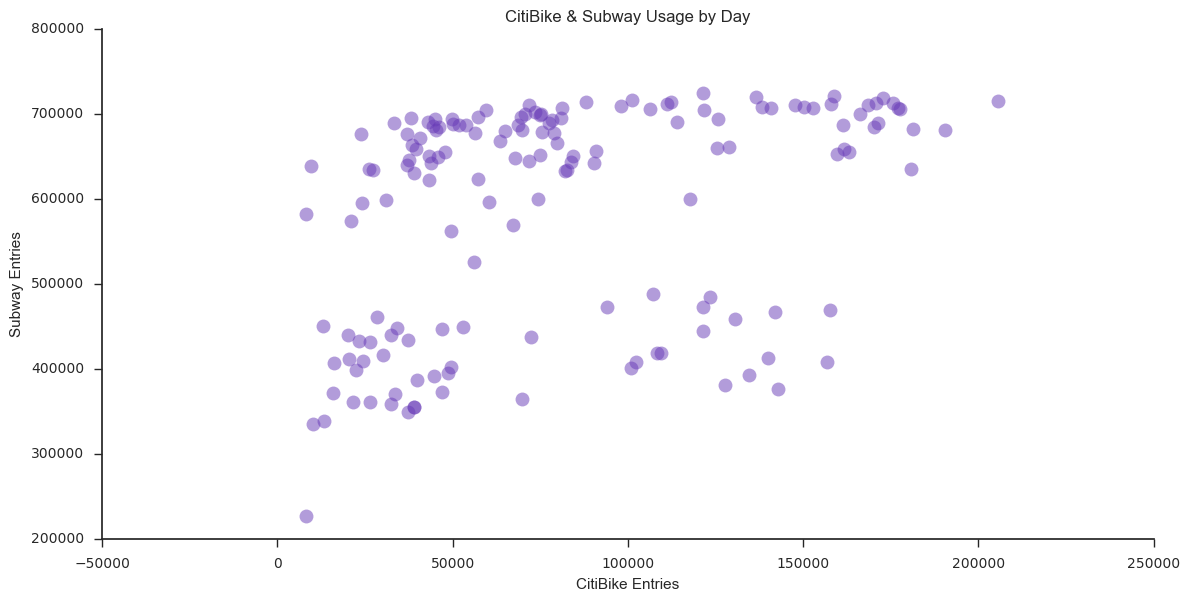

In [132]:
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
%matplotlib inline



# Create scatterplot with regression line
# c = sns.scatter(x='C', y='S', data=final_df, ci = False, 
#     scatter_kws={'color':'black','alpha':0.9,'s':80})#,
#     #line_kws={'color':'black','alpha':0.9,'lw':4},marker='x')

# # remove the top and right line in graph
# sns.despine()

# # Set graph size
# c.figure.set_size_inches(10,7)
# # Set graph title
# c.axes.set_title('CitiBike & Subway Usage by Day',color='black',fontsize=18,alpha=0.95)
# # Set xlabel
# c.set_xlabel('Daily CitiBike Usage',size = 16,color='black',alpha=1)
# # Set ylabel
# c.set_ylabel('Daily Subway Usage',size = 16,color='black',alpha=1)
# # Set ticklabel
# c.tick_params(labelsize=10,labelcolor='black')



sns.set_style("ticks")

sns.lmplot(x='C', y='S', 
           data=final_df, 
           fit_reg=False,
           scatter_kws={"marker": "D", 'color':'#673AB7','alpha':.5,'s':100},
           size=6, aspect=2)
            
plt.title('CitiBike & Subway Usage by Day')  
plt.xlabel('CitiBike Entries')
plt.ylabel('Subway Entries')